# Teoría de perturbaciones (niveles de energía no degenerados)

El objetivo es determinar una solución aproximada a la ecuación de Schrödinger para un Hamiltoniano $\hat{H}$. La suposición importante en la teoría de perturbaciones es que $\hat{H}$ es un poco diferente de un Hamiltoniano $\hat{H}^{(0)}$ del cual conocemos su solución; es decir, conocemos sus eigenfunciones y eigenvalores. Esto es 

$$
\hat{H}^{(0)} \psi_n^{(0)} = E_n^{(0)}  \psi_n^{(0)}
$$

donde tanto $E_n^{(0)}$ y $\psi_n^{(0)}$ son conocidos. La diferencia entre $\hat{H}$ y $\hat{H}^{(0)}$ se llama la perturbación y la denotamos por $\hat{H}'$, esto es

$$
\hat{H}' = \hat{H}-\hat{H}^{(0)}
$$

El método presentado en este notebook tiene la suposición los niveles de energía $\big\{ E_n^{(0)}\big\}$ no están degenerados.

Proponemos una solución en serie aproximada a los eigenvalores ($E_n$) y las eigenfunciones ($\psi_n$) de $\hat{H}$ en términos de $E_n^{(0)}$ y $\psi_n^{(0)}$ y correcciones a dichos valores. De tal forma que tenemos,

$$
E_n &=& E_n^{(0)}+ E_n^{(1)} + E_n^{(2)} +\ldots \\
\psi_n &=& \psi_n^{(0)}+\psi^{(1)}+\psi^{(2)}+\ldots
$$

```{admonition} Inserto matemático: Correcciones
:class: dropdown

Con el fin de escribir las expresiones para las diferentes correcciones introducimos la notación para los elementos de matriz de la perturbación, ($\hat{H}'$),

$$
\hat{H}'_{m,n} = \langle \psi_m^{(0)} | \hat{H}' | \psi_n^{(0)} \rangle = \int \big( \psi_m^{(0)} \big)^* \hat{H}' \psi_n ^{(0)} \,dq
$$

donde $\psi_n^{(0)}(q)$ son la eigenfunciones que conocemos de $\hat{H}^{(0)}$ y hemos denoatdo por $q$ a las coordenadas de las que dependen.

En términos de los elementos de matriz de $\hat{H}'$ tenemos,

$$
E_n \approx E_n^{(0)} +H'_{n,n} + \sum_{m \neq n } \frac{|H'_{m,n}|^2}{E_n^{(0)}-E_m^{(0)}}
$$

y

$$
\psi_n \approx \psi_n^{(0)} + \sum_{m\neq n} \frac{\hat{H}'_{m,n}}{E_n^{(0)}-E_m^{(0)}} \psi_m^{(0)}
$$
```

---

## Ejemplo - Oscilador anarmónico
En Hamiltoniano del oscilador anarmónico de una partícula en una dimensión es:

$$
\hat{H} = \underbrace{-\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + \frac{1}{2} k x^2 }_{\hat{H}^{(0)}} + \underbrace{cx^3 + dx^4}_{\hat{H}'}
$$

Los eigenvalores y eigenfunciones del oscilador armónico son:

$$
E_n^{(0)} = \bigg(n+\frac{1}{2}\bigg) h\nu
$$

$$
\psi_n^{(0)} (x) = \frac{1}{\sqrt{2^n n !}} \bigg( \frac{\alpha}{\pi} \bigg)^{1/4} e^{-\alpha x^2/2 } H_n\bigg( \alpha^{1/2}\,x \bigg)
$$

donde  $\alpha = 2\pi\nu m /\hbar$ y 

$$
\nu = \frac{1}{2\pi }\bigg( \frac{k}{m}  \bigg)^{1/2}
$$

Realicemos numéricamente el cálculo de los elementos de matriz. 

**Importe las siguientes librerías**

- pylab
- scipy.special

De la librería `scipy.special` ocuparemos las funciones `factorial` y `eval_hermite`

In [1]:
# Librerías

In [2]:
from pylab import *
from scipy.special import factorial
from scipy.special import eval_hermite as Hn

**Defina los valores de los parámetros y constantes a usar.** 

Tomemos de ejemplo los valores de la molécula de CO.


|Parámetro|Valor|
|-------- |--------|
|     $k$|$1902.5\,{\rm N/m}$           |
|   $\mu$|$1.1391 \times10^{-26}\,{\rm kg}$|
|   $\nu$|$\displaystyle \frac{1}{2\pi}\sqrt{\frac{k}{m}}$|
|$\alpha$|$2\pi\nu m/\hbar $|



In [3]:
# Defina los valores y constantes en el Hamiltoniano del oscilador armónico 
# e imprima los valores de ν y el valor del E = hν/2

In [4]:
π = pi
k = 1902.5             # [ N·m^{-1}]  constante de fuerza del CO
m = 1.1391e-26         # [kg] masa reducida de C-O
ħ = 1.0545718e-34      # [J·s] 
h = 2*pi*ħ
e = 1.602e-19
ν = 0.5*sqrt( k/m )/π
α = 2*π*ν*m/ħ          # [m^{-2}]

print ("    ν  = {0:.3e} [Hz]".format(ν))
print ("√(1/α) = {0:.3e} [m]".format(1/sqrt(α)))

# n -> nivel de energía
n   = 0

# Definimos una función que nos dé la eigenenergía del 
# oscilado armónico
def eigenEn0(n):
    return (n+0.5) *h*ν

E00 = eigenEn0(0)

print ("E0^(0) = {0:.3f} [eV]".format(E00/e))
# Notemos que al imprimir el valor de E00 dividimos
# por la carga elemental para obtener las unidades de eV.

    ν  = 6.504e+13 [Hz]
√(1/α) = 4.760e-12 [m]
E0^(0) = 0.135 [eV]


**Defina las eigenfunciones del oscilador armónico.**

In [5]:
# Define como función de python las eigenfunciones del oscilador armónico

In [6]:
# Definimos la función que nos devuelva la eigenfunción 
# del oscilador armónico
def funcΨ0n(n,x):
    return ( 1/sqrt(2**n*factorial(n)) )*( (α/π)**(0.25) )*exp(-α*x*x/2)*Hn(n,sqrt(α)*x)

**Verifica la normalización de las eigenfunciones**

```{margin}
La integral numérica de una función puede realizarse con la función `numpy.trapz`.
```

In [7]:
# Define un intervalo donde evaluar la función y la integral
# La integral numérica de una función puede realizarse con 
# la función numpy.trapz

In [8]:
# La longitud (1/α)^{1/2} es característica de las eigenfunciones 
# por lo que es un buen parámetro para determinar el intervalo de 
# los valores de x.

x   = linspace(-10/sqrt(α),10/sqrt(α),10000)
Ψ0n = funcΨ0n(n,x)

# Podemos verificar que las eigenfunciones están normalizadas utilizando la regla del trapecio
# Notemos que las eigenfunciones son reales por lo que Ψ*(x) = Ψ(x)
Ψ2       = Ψ0n*Ψ0n
Integral = trapz(Ψ2,x)
print ("Integral: {0:.3f}".format(Integral))

Integral: 1.000


**Evalúa los elementos de matriz de $H'=cx^3+dx^4$** 

Utiliza que $c=600\,{\rm J}/{\rm m}^3$ y $d=1\times 10^{-4}\alpha k^2/4$

In [9]:
# Define H' y define una función para evaluar 
# los elementos de matriz dado un m y n

In [10]:
# Definimos la perturbación H'
c  = 600; d = 1e-4*(α*k*k)/4

Hp = c*x**3 + d*x**4

# Definimos la función que evalúa
def ElementoMatriz(m,n,x):
    Ψm0 = funcΨ0n(m,x)
    Ψn0 = funcΨ0n(n,x)
    Int = trapz( Ψm0*Hp*Ψn0,x )
    return Int

**Visualiza los elementos de matriz**

```{margin}
Los valores de los elementos de una matriz pueden graficarse usando `matplotlib.pyplot.imshow`.
```


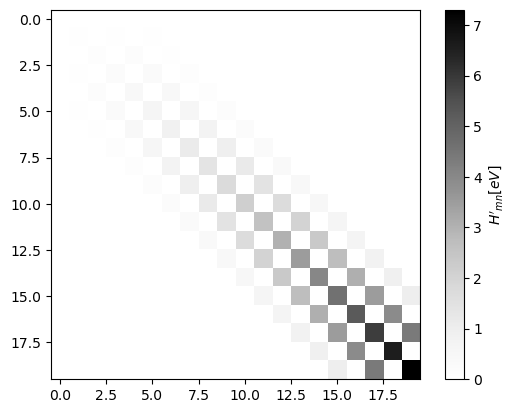

In [11]:
# Construimos los elementos de matriz de H'_{m,n}
# Notemos que numéricamente la matriz
# tiene un tamaño finito
m_max = 20

matrizHp = zeros((m_max,m_max))

for m in range(m_max):
    for n in range(m_max):
        matrizHp[(m,n)] = ElementoMatriz(m,n,x)

# Las matrices se pueden visualizar utilizando un mapa de colores
plotM = imshow(matrizHp/e,cmap="Greys");
plt.colorbar(label="$H'_{mn} [eV]$");
# Notamos como los valores distinto de cero están cerca de la diagonal
# lo cual es típico en la teoría de perturbaciones

---

### Corrección a primer orden (analítico vs numérico)
La corrección a primer orden de la energía de la energía del estado base es,

$$
E_0^{(1)} = \frac{3d}{4\alpha^2} = \frac{3dh^2}{64\pi^4 \nu^2 m^2}
$$

**¿Podría verificarla numéricamente?**

In [12]:
# Compare la expresión analítica con la corrección a primer orden

In [13]:
# Solución

# De acuerdo con la expresión analítica
E01analitico = 3*d/4/α/α
print ("E0^(1) = {0:.3e} [eV]".format(E01analitico/e))

# De la teoría de perturbaciones tenemos que
# E0^(1) = H'_{0,0}
E01numerico = matrizHp[(0,0)]
print ("E0^(1) = {0:.3e} [eV]".format(E01numerico/e))

E00 = eigenEn0(0)

print ("E0^(0) = {0:.3e} [eV]".format(E00/e))

# Por tanto la aproximación a primer orden en la energía es:
print ("    En ≈ {0:.3e} [eV]".format(E00/e + E01numerico/e))
# ¿La energía es mayor o menor a la del oscilador armónico?

E0^(1) = 9.597e-03 [eV]
E0^(1) = 9.597e-03 [eV]
E0^(0) = 1.345e-01 [eV]
    En ≈ 1.441e-01 [eV]


### Correcciones a primer orden (niveles excitados)

¿Podría calcular la corrección a primer orden del primer nivel excitado del oscilador armónico?

In [14]:
# Calcule las correcciones a primer orden de n>0

In [15]:
# Solución

# De la teoría de perturbaciones tenemos que
# E1^(1) = H'_{1,1}
E11numerico = matrizHp[(1,1)]
print ("E1^(1) = {0:.3e} [eV]".format(E11numerico/e))

E10 = eigenEn0(1)

print ("E1^(0) = {0:.3e} [eV]".format(E10/e))

# Por tanto la aproximación a primer orden en la energía es:
print ("    En ≈ {0:.3e} [eV]".format(E10/e + E11numerico/e))
# ¿La energía es mayor o menor a la del oscilador armónico?

E1^(1) = 4.798e-02 [eV]
E1^(0) = 4.035e-01 [eV]
    En ≈ 4.515e-01 [eV]


###  Correcciones a primer orden (primeros 5 niveles)
Realiza un gráfico de los primeros 5 niveles de energía del oscilador armónico y los niveles con la primera corrección a la energía.

In [16]:
# Solución

En1numerico = array( [ matrizHp[n,n] for n in range(5) ] )

En0         = array( [ eigenEn0(n) for n in range(5) ] )

Enapprox    = En0 + En1numerico

Text(0, 0.5, '$E [eV]$')

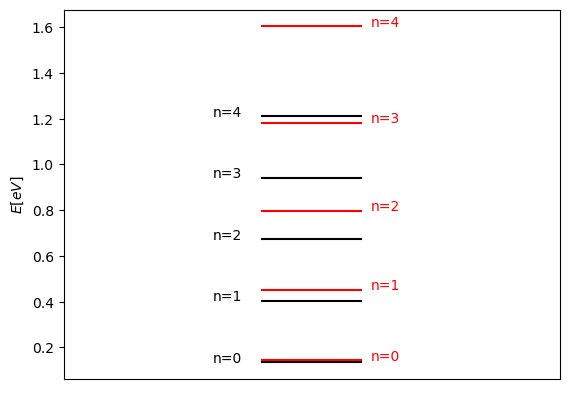

In [17]:
for n in range(5):
    plot( [0,1],[En0[n]/e,En0[n]/e],c='k' )
    plot( [0,1],[Enapprox[n]/e,Enapprox[n]/e],c='r' )
    text(-0.5,En0[n]/e,"n={0}".format(n))
    text( 1.1,Enapprox[n]/e,"n={0}".format(n),color='r')
xlim(-2,3)
xticks([])
ylabel("$E [eV]$")

### Corrección a segundo orden

De la teoría de perturbaciones tenemos que 

$$
E_n ^{(2)}=\sum_{m \neq n } \frac{|H'_{m,n}|^2}{E_n^{(0)}-E_m^{(0)}}
$$

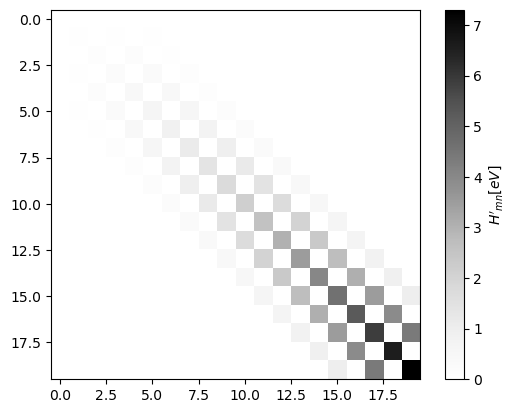

In [18]:
# Previamente realizamos el gráfico de los elementos de matriz

# Las matrices se pueden visualizar utilizando un mapa de colores
plotM = imshow(matrizHp/e,cmap="Greys");
plt.colorbar(label="$H'_{mn} [eV]$");
# Notamos como los valores distinto de cero están cerca de la diagonal
# lo cual es típico en la teoría de perturbaciones

In [19]:
# Sin embargo, los términos a sumar son los elementos de matriz 
# al cuadrado divididos por la diferencia de energía del nivel a corregir.

# Analicemos los términos de la suma cuando n = 0, es decir el estado base
n   = 0
E00 = eigenEn0(0) 
# Dado que las eigenfunciones son reales no tenemos que tomar el conjugado
SegundoOrden = array( [ matrizHp[(m,n)]*matrizHp[(m,n)]/( eigenEn0(n)-eigenEn0(m) ) \
                    for m in range(m_max) if m != n ] )

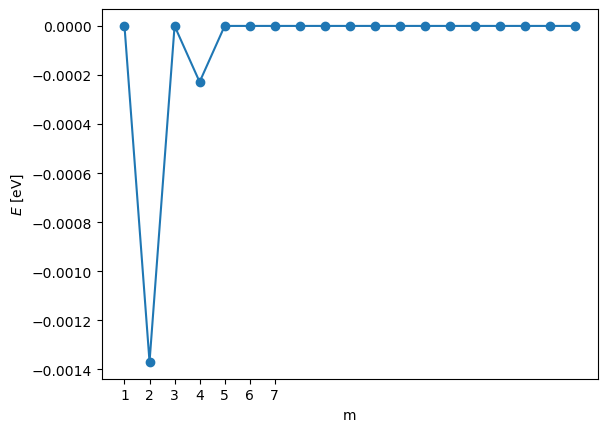

In [20]:
# Grafiquemos los SegundoOrden
plot(range(1,m_max),SegundoOrden/e,'o-');
xticks([1,2,3,4,5,6,7]);
ylabel("$E$ [eV]")
xlabel("m");

#Podemos notar en este caso que la mayor corrección al estado base proviene del nivel n = 2

In [21]:
# Notamos que los sumandos siempre son negativos para el estado base
print (" Máximo valor de los sumandos: {0:.3e} eV".format( max(SegundoOrden)/e ))
# Por lo que las correcciones de segundo orden disminuirán con respecto a 
# las de primer orden.

 Máximo valor de los sumandos: -3.143e-41 eV


### Correcciones primer orden vs segundo orden
Realiza un gráfico de los primeros 5 niveles de energía del oscilador armónico y los niveles con la segunda corrección a la energía. ¿Es muy diferente al resultado de la corrección a primer orden?

In [22]:
# Solución

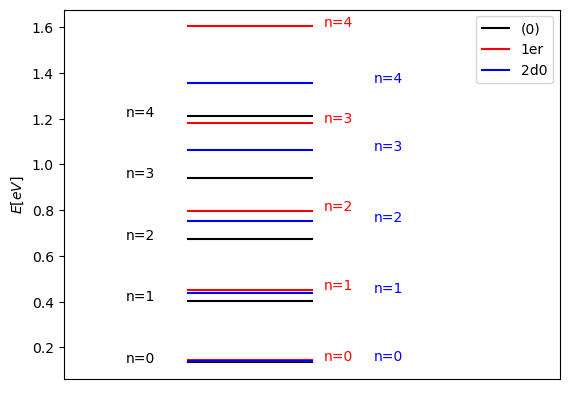

In [23]:
def SumaSegundoOrden(n,m_max=20):
    SegundoOrden = array( [ matrizHp[(m,n)]*matrizHp[(m,n)]/( eigenEn0(n)-eigenEn0(m) ) \
                        for m in range(m_max) if m != n ] )
    En2 = SegundoOrden.sum()
    return En2


En1numerico = array( [ matrizHp[n,n] for n in range(5) ] )

En2numerico = array( [ SumaSegundoOrden(n) for n in range(5) ] )

En0         = array( [ eigenEn0(n) for n in range(5) ] )


Enapprox1 = En0 + En1numerico
Enapprox2 = En0 + En1numerico + En2numerico


plot( [0,1],[En0[0]/e,En0[0]/e],c='k',label='(0)' )
plot( [0,1],[Enapprox1[0]/e,Enapprox1[0]/e],c='r',label='1er' )
plot( [0,1],[Enapprox2[0]/e,Enapprox2[0]/e],c='b',label='2d0' )
text(-0.5,En0[0]/e,"n={0}".format(n))
text( 1.1,Enapprox1[0]/e,"n={0}".format(n),color='r')
text( 1.5,Enapprox2[0]/e,"n={0}".format(n),color='b')
for n in range(1,5):
    plot( [0,1],[En0[n]/e,En0[n]/e],c='k' )
    plot( [0,1],[Enapprox1[n]/e,Enapprox1[n]/e],c='r' )
    plot( [0,1],[Enapprox2[n]/e,Enapprox2[n]/e],c='b' )
    text(-0.5,En0[n]/e,"n={0}".format(n))
    text( 1.1,Enapprox1[n]/e,"n={0}".format(n),color='r')
    text( 1.5,Enapprox2[n]/e,"n={0}".format(n),color='b')
xlim(-1,3)
xticks([])
ylabel("$E [eV]$");
legend(loc=0);